Image Segmentation

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/image_segmentation.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

sure_bg = cv2.dilate(opening, kernel, iterations = 3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

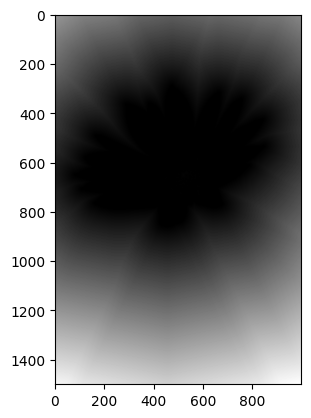

In [ ]:
plt.imshow(dist_transform, cmap = 'gray')

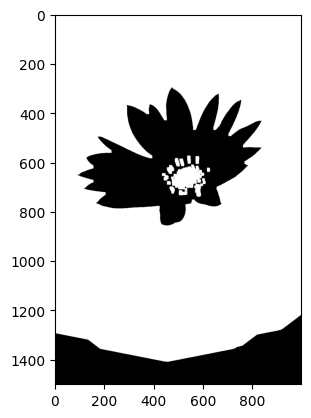

In [ ]:
plt.imshow(unknown, cmap = 'gray')

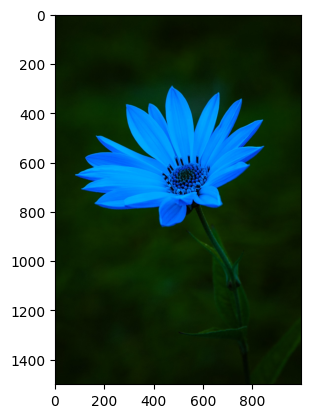

In [ ]:
plt.imshow(img, cmap = 'gray')

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown == 255] = 0

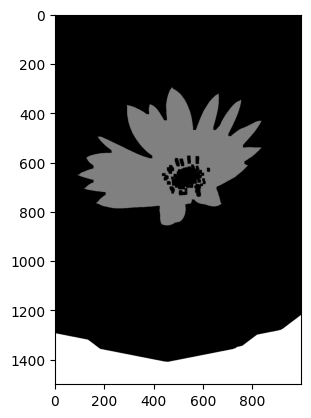

In [ ]:
plt.imshow(markers, cmap = 'gray')

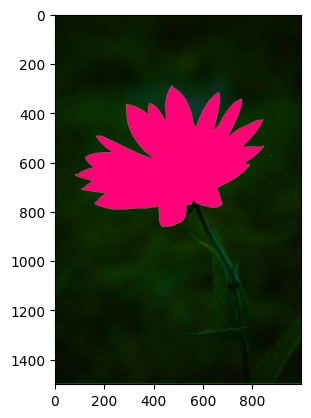

In [ ]:
markers = cv2.watershed(img, markers)
img[markers == 1] = [255, 0,120]

plt.imshow(img)

k - Means Clustering

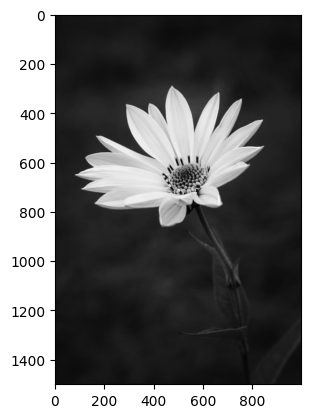

In [ ]:
plt.imshow(gray, cmap = 'gray')

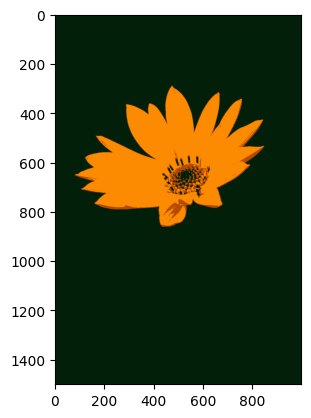

In [ ]:
img = cv2.imread('/content/image_segmentation.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixel_vals = img.reshape((-1, 3))

pixel_vals = np.float32(pixel_vals)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((img.shape))

plt.imshow(segmented_image)